### **Task 01** 
#### Implement a **Linear Regression** model to predict the **prices of houses** based on their **square footage** and the **number of bedrooms and bathrooms**.

##### Importing Libraries

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

# Setting the plot style
palette = sns.color_palette("bright", 20)
sns.set_theme(style = "white", palette = palette)

##### Data Cleaning and Exploration

In [2]:
# Loading Datasets
houses_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

# Displaying first few rows
print("Basic Information about the dataset", "\nNumber of rows : ", len(houses_data), "\nNumber of columns : ", len(houses_data.columns),"\n")
houses_data.head()

Basic Information about the dataset 
Number of rows :  1460 
Number of columns :  81 



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Summary of the dataset
print(houses_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# Description of the dataset
houses_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
# Checking for missing values
missing_values = houses_data.isnull().sum()

# Displaying columns having missing values
columns_having_missing_values = missing_values[missing_values > 0]
print("Columns having missing values : ")
print(columns_having_missing_values)

Columns having missing values : 
LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


##### Feature Selection

In [6]:
# Viewing Columns related to the question
houses_data[["BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","LotArea","GrLivArea"]]

,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,LotArea,GrLivArea
0,1,0,2,1,3,8450,1710
1,0,1,2,0,3,9600,1262
2,1,0,2,1,3,11250,1786
3,1,0,1,0,3,9550,1717
4,1,0,2,1,4,14260,2198
...,...,...,...,...,...,...,...
1455,0,0,2,1,3,7917,1647
1456,1,0,2,0,3,13175,2073
1457,0,0,2,0,4,9042,2340
1458,1,0,1,0,2,9717,1078


##### Feature Engineering

In [7]:
# Creating a new feature for both train and test set
houses_data["TotalBathrooms"] = (
    houses_data["FullBath"] + 0.5 * houses_data["HalfBath"] + 
    houses_data["BsmtFullBath"] + 0.5 * houses_data["BsmtHalfBath"] )

test_data["TotalBathrooms"] = (
    test_data["FullBath"] + 0.5 * test_data["HalfBath"] + 
    test_data["BsmtFullBath"] + 0.5 * test_data["BsmtHalfBath"] )

##### Plotting Features against Target to see the relation between them

Text(0, 0.5, 'Sale Price')

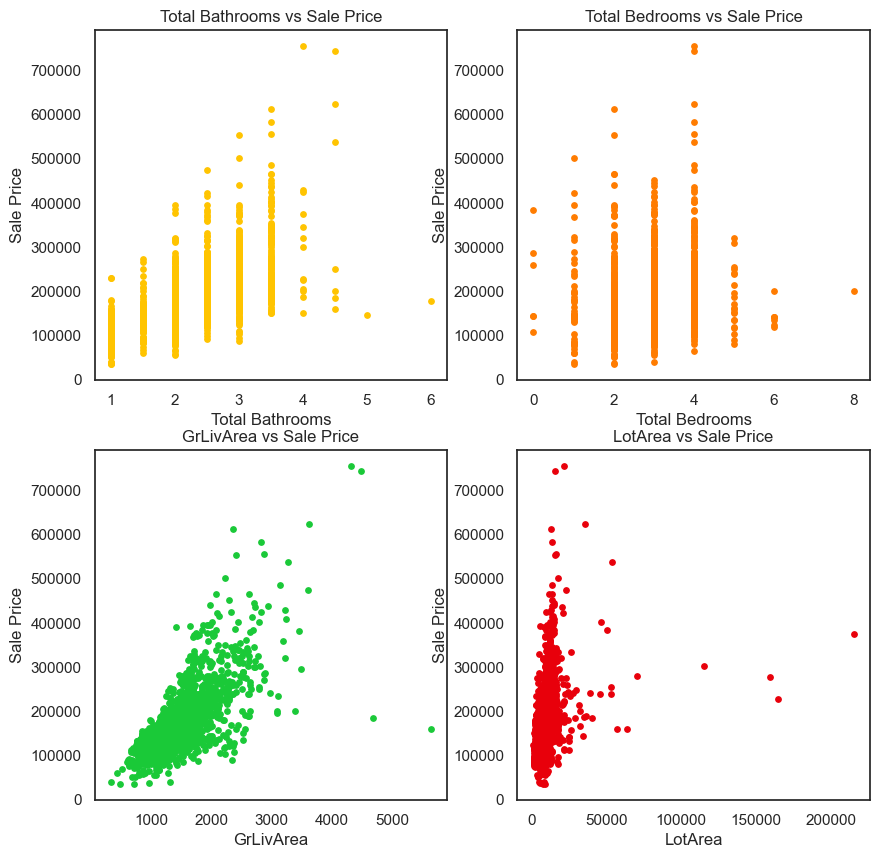

In [8]:
# Plotting the individual feature with the target
plt.figure(figsize=(10,10))

# 1st plot 
pt1=plt.subplot(221)
plt.scatter(houses_data["TotalBathrooms"],houses_data["SalePrice"],s=15,color=palette[18])
plt.title("Total Bathrooms vs Sale Price")
plt.xlabel("Total Bathrooms")
plt.ylabel("Sale Price")

# 2nd plot
pt2=plt.subplot(222)
plt.scatter(houses_data["BedroomAbvGr"],houses_data["SalePrice"],s=15,color=palette[1])
plt.title("Total Bedrooms vs Sale Price")
plt.xlabel("Total Bedrooms")
plt.ylabel("Sale Price")

# 3rd plot
pt3=plt.subplot(223)
plt.scatter(houses_data["GrLivArea"],houses_data["SalePrice"],s=15,color=palette[2])
plt.title("GrLivArea vs Sale Price")
plt.xlabel("GrLivArea")
plt.ylabel("Sale Price")

# 4th plot
pt3=plt.subplot(224)
plt.scatter(houses_data["LotArea"],houses_data["SalePrice"],s=15,color=palette[3])
plt.title("LotArea vs Sale Price")
plt.xlabel("LotArea")
plt.ylabel("Sale Price")

In [9]:
train_features = houses_data[["TotalBathrooms", "BedroomAbvGr", "GrLivArea", "LotArea"]]
test_features = test_data[["TotalBathrooms", "BedroomAbvGr", "GrLivArea", "LotArea"]]

In [10]:
def remove_outliers_iqr(data, features):
    for feature in features:
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        data = data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)]
    return data

In [11]:
houses_data_cleaned = remove_outliers_iqr(houses_data, train_features)
print(houses_data.shape)
print(houses_data_cleaned.shape)

(1460, 82)
(955, 82)


Text(0, 0.5, 'Sale Price')

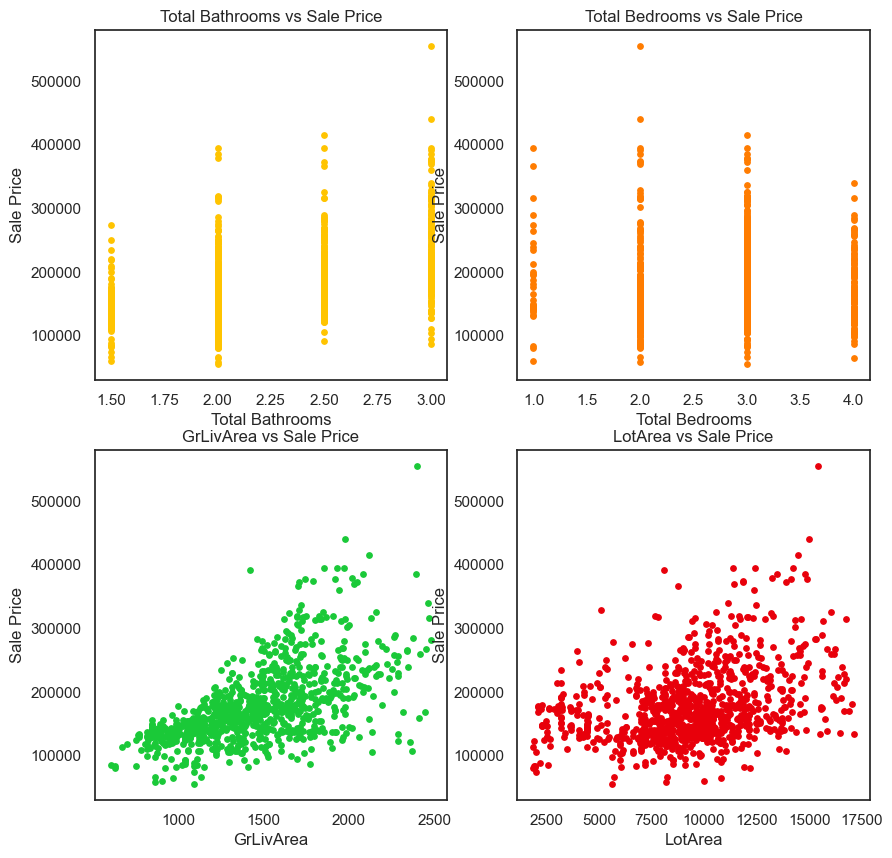

In [12]:
# Plotting the individual feature with the target
plt.figure(figsize=(10,10))

# 1st plot 
pt1=plt.subplot(221)
plt.scatter(houses_data_cleaned["TotalBathrooms"],houses_data_cleaned["SalePrice"],s=15,color=palette[18])
plt.title("Total Bathrooms vs Sale Price")
plt.xlabel("Total Bathrooms")
plt.ylabel("Sale Price")

# 2nd plot
pt2=plt.subplot(222)
plt.scatter(houses_data_cleaned["BedroomAbvGr"],houses_data_cleaned["SalePrice"],s=15,color=palette[1])
plt.title("Total Bedrooms vs Sale Price")
plt.xlabel("Total Bedrooms")
plt.ylabel("Sale Price")

# 3rd plot
pt3=plt.subplot(223)
plt.scatter(houses_data_cleaned["GrLivArea"],houses_data_cleaned["SalePrice"],s=15,color=palette[2])
plt.title("GrLivArea vs Sale Price")
plt.xlabel("GrLivArea")
plt.ylabel("Sale Price")

# 4th plot
pt3=plt.subplot(224)
plt.scatter(houses_data_cleaned["LotArea"],houses_data_cleaned["SalePrice"],s=15,color=palette[3])
plt.title("LotArea vs Sale Price")
plt.xlabel("LotArea")
plt.ylabel("Sale Price")

<Axes: >

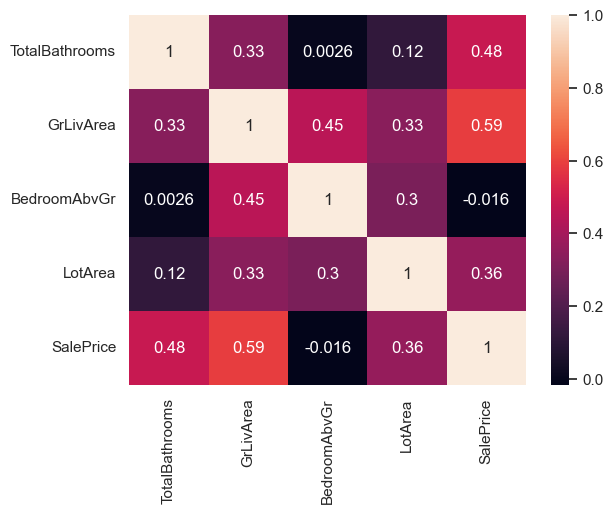

In [13]:
# Creating a correlation matrix
X = houses_data_cleaned[["TotalBathrooms","GrLivArea","BedroomAbvGr","LotArea"]]
y = houses_data_cleaned[["SalePrice"]]
data_subset = pd.concat([X, y], axis=1)
correlation_matrix = data_subset.corr()
sns.heatmap(correlation_matrix, annot=True)

##### Model Building and Training

In [14]:
# Splitting the data into Train and Test data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Filling NAN values if any
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

In [16]:
# Applying Linear Regression on Training dataset
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [17]:
# Printing Intercept and Coefficient
print("Intercept",model.intercept_)
print("Coefficients",model.coef_)

Intercept [-1800.11836612]
Coefficients [[ 3.44286980e+04  9.10730693e+01 -2.69842976e+04  4.87194550e+00]]


In [18]:
# Testing the model on Test Dataset
y_pred = model.predict(X_test)

##### Model Evaluation

In [19]:
# Calculating Mean Squared Error and R squared
mse = mean_squared_error(y_test,y_pred)
print("Mean Squared Error : ",mse)
r2 = r2_score(y_test,y_pred)
print("R squared : ",r2)

Mean Squared Error :  1225588488.0662117
R squared :  0.5989443946162907


In [20]:
# Cross validation for evaluation of model performance
cv_score = cross_val_score(model,X,y,cv=5)
print("Cross Validation Score : ",cv_score)
print("Mean Cross Validation Score : ",cv_score.mean())

Cross Validation Score :  [0.50660751 0.64859228 0.50937202 0.55128943 0.5073794 ]
Mean Cross Validation Score :  0.5446481283077282


Text(0.5, 1.0, 'Original vs Predicted')

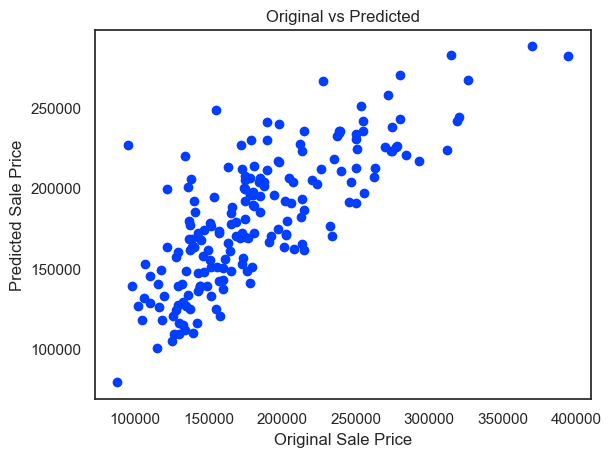

In [21]:
# Scatter plot between original and predicted sale price
plt.scatter(y_test,y_pred)
plt.xlabel("Original Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Original vs Predicted")

##### Using Model to Predict Values

In [22]:
# Using Test data to make predictions
X_final_test = test_data[["TotalBathrooms","GrLivArea","BedroomAbvGr","LotArea"]]

# Preprocessing Test data
X_final_test = X_final_test.fillna(X_final_test.mean())

# Making Predictions using the trained model
y_final_pred = model.predict(X_final_test)

# Printing the Predictions
print(y_final_pred)

[[116883.20515423]
 [159434.19141104]
 [219055.77000054]
 ...
 [168032.43408464]
 [108098.89602732]
 [232367.09177009]]


In [23]:
# Loading the sample_submission.csv
submission = pd.read_csv("sample_submission.csv")

# Saving the predictions to a CSV file
output = pd.DataFrame({
        "ID": test_data["Id"],
        "Original_SalePrice": submission["SalePrice"],
        "Predicted_SalePrice": y_final_pred.reshape(-1)
})

output.to_csv("predictions.csv", index = False)

Text(0.5, 1.0, 'Original vs Predicted')

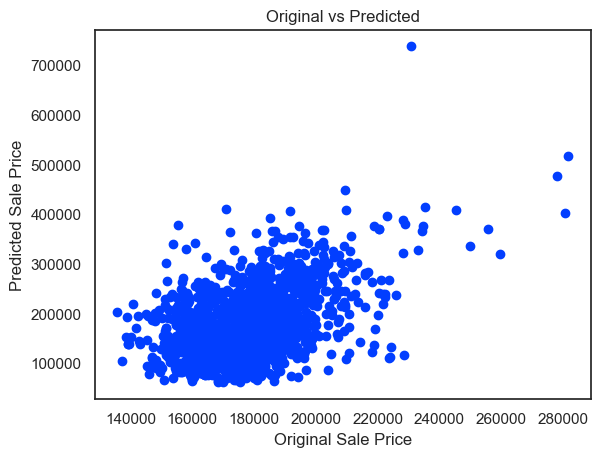

In [26]:
# Scatter plot between original and predicted sale price
plt.scatter(submission["SalePrice"],y_final_pred)
plt.xlabel("Original Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Original vs Predicted")

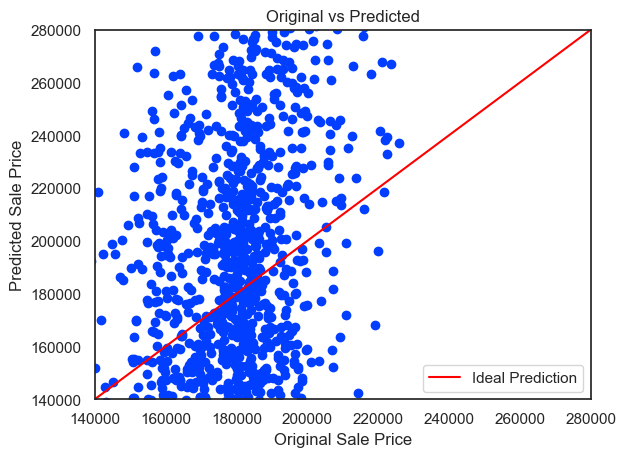

In [28]:
# Scatter plot between original and predicted sale price
plt.scatter(submission["SalePrice"],y_final_pred)
plt.xlabel("Original Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Original vs Predicted")

plt.xlim(140000, 280000)  # Adjust based on your data's expected range
plt.ylim(140000, 280000)  # Ensure both axes have the same range for better comparison

# Add a line representing the ideal prediction
plt.plot([140000, 280000], [140000, 280000], color='red', label="Ideal Prediction")  # Adjust range here as well
plt.legend()
